In [1]:
!pip install hdbscan

# make dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


(200, 2)


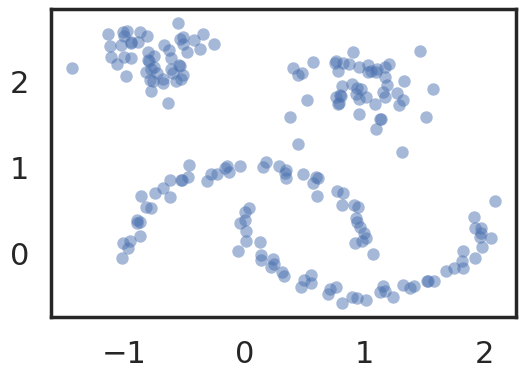

In [3]:
plt.figure(figsize=(6,4))
moons, _ = data.make_moons(n_samples=100, noise=0.05)
blobs, _ = data.make_blobs(n_samples=100, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

print(test_data.shape)

# HDBSCAN

In [4]:
import hdbscan

In [5]:
X=test_data
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,gen_min_span_tree=True).fit(X)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [6]:
clusterer

HDBSCAN(gen_min_span_tree=True)

# plot minimum spanning tree

- 依據 Mutual reachability distance 建立一個minimum spanning tree
- 下圖,點的距離愈近,邊的顏色愈深 ; 反之, 點的距離愈遠,顏色愈淺

<Axes: >

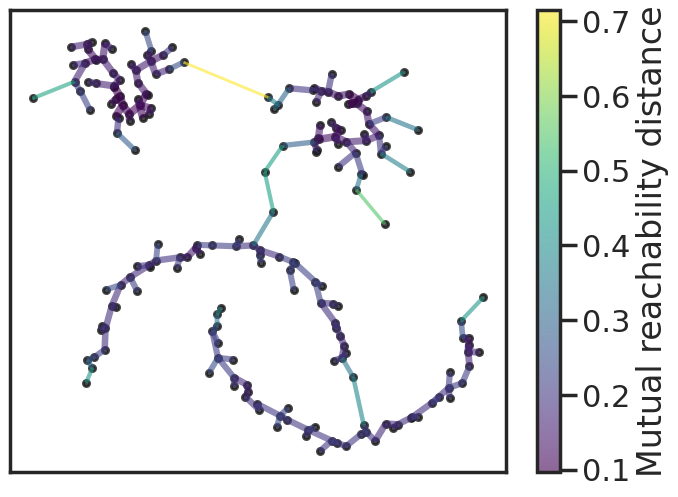

In [7]:
plt.figure(figsize=(8,6))
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=20,
                                      edge_linewidth=2)

# Plot dendrogram

<Axes: ylabel='distance'>

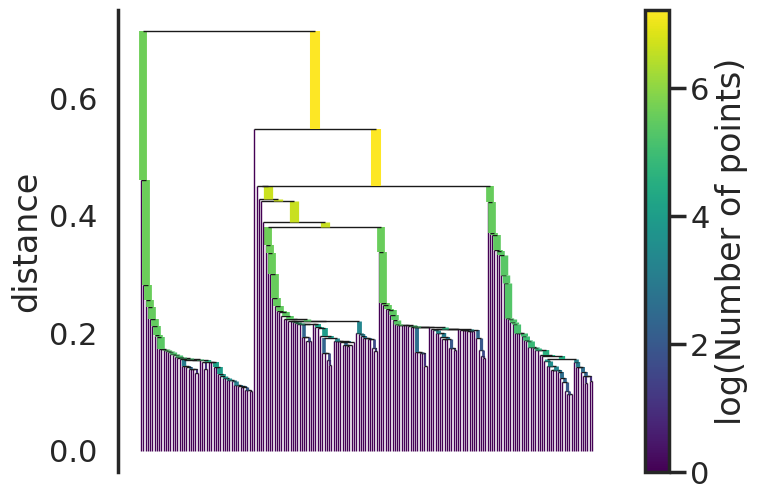

In [8]:
plt.figure(figsize=(8,6))
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

 # Plot condensed tree

<Axes: ylabel='$\\lambda$ value'>

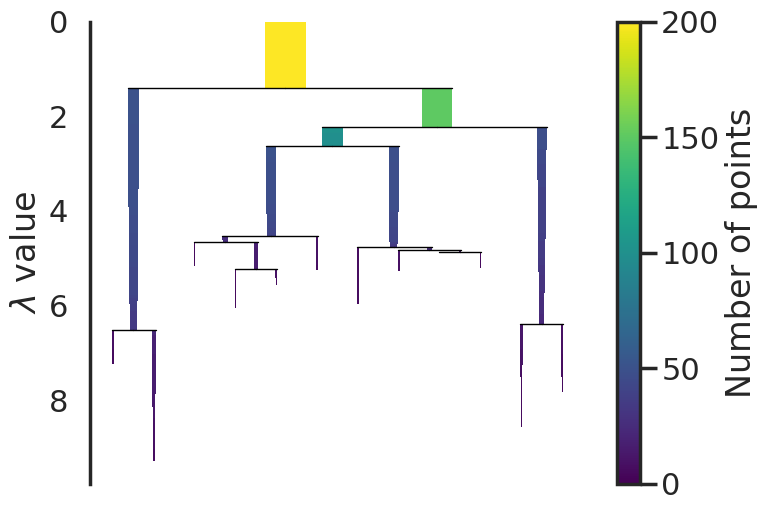

In [9]:
plt.figure(figsize=(8,6))
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

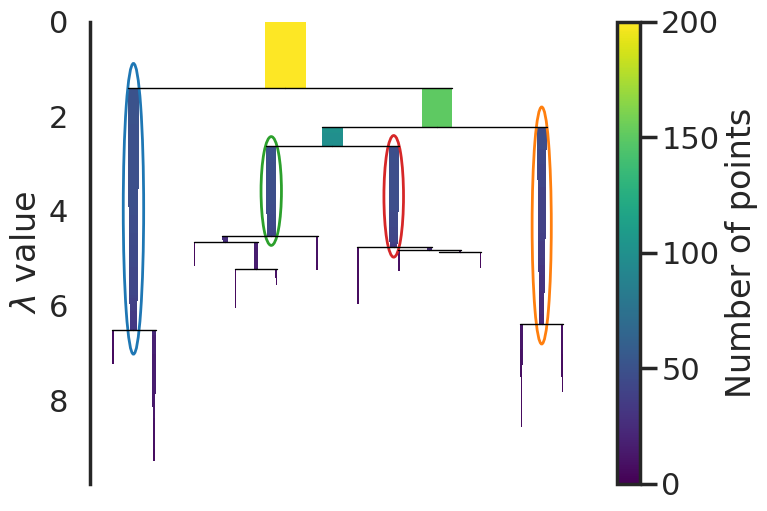

In [10]:
plt.figure(figsize=(8,6))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [11]:
clusterer.labels_[:10]

array([ 2,  3,  3,  2,  2,  2, -1,  3,  3,  3])

In [12]:
clusterer.probabilities_[:10]

array([1.        , 1.        , 1.        , 0.65475313, 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.98668413])

In [13]:
import pandas as pd
pd.DataFrame(data=clusterer.labels_).value_counts()

,count
0,
0,50
2,50
3,48
1,47
-1,5


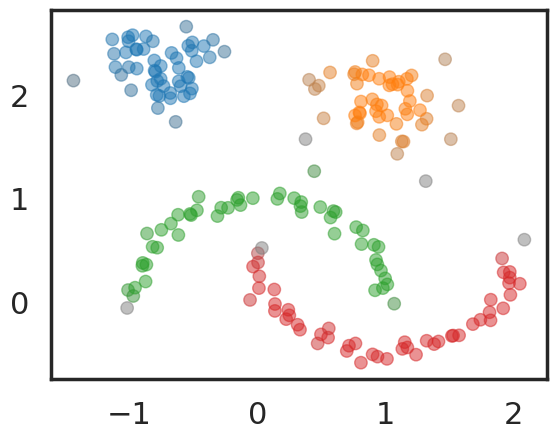

In [14]:
#用分好的cluster lable 作為顏色,而機率值作為色彩飽和度
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':1}
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)